In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data = pd.read_csv('D:/datmin/covid_19_data.csv',sep=';')
dt = pd.DataFrame(data)
dt

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
13845,13846,04/10/2020,Wyoming,US,10/04/2020 23:01,239.0,0.0,0.0
13846,13847,04/10/2020,Xinjiang,Mainland China,10/04/2020 23:01,76.0,3.0,73.0
13847,13848,04/10/2020,Yukon,Canada,10/04/2020 23:01,8.0,0.0,0.0
13848,13849,04/10/2020,Yunnan,Mainland China,10/04/2020 23:01,184.0,2.0,173.0


In [3]:
listdata = np.array(dt[['Confirmed','Deaths','Recovered']].values.tolist())
listdata

array([[1.000e+00, 0.000e+00, 0.000e+00],
       [1.400e+01, 0.000e+00, 0.000e+00],
       [6.000e+00, 0.000e+00, 0.000e+00],
       ...,
       [8.000e+00, 0.000e+00, 0.000e+00],
       [1.840e+02, 2.000e+00, 1.730e+02],
       [1.267e+03, 1.000e+00, 1.235e+03]])

In [4]:
ambil = pd.DataFrame(data = listdata,columns=['Confirmed','Deaths','Recovered'])
ambil

,Confirmed,Deaths,Recovered
0,1.0,0.0,0.0
1,14.0,0.0,0.0
2,6.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
13845,239.0,0.0,0.0
13846,76.0,3.0,73.0
13847,8.0,0.0,0.0
13848,184.0,2.0,173.0


In [5]:
x = ambil.iloc[:,0].values.reshape(-1,1)
y = ambil.iloc[:,1].values.reshape(-1,1)
print(x)
print(y)

[[1.000e+00]
 [1.400e+01]
 [6.000e+00]
 ...
 [8.000e+00]
 [1.840e+02]
 [1.267e+03]]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [2.]
 [1.]]


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print(regressor.intercept_)

[-30.31371355]


In [9]:
print(regressor.coef_)
#Artinya Y = 0.06727337x - (-30.31371355)

[[0.06727337]]


In [10]:
regressor.score(x_test,y_test)
#Akurasi = 0.75462583895044

0.75462583895044

In [11]:
y_pred = regressor.predict(x_test)

In [24]:
DF = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
DF

,Actual,Predicted
0,765.0,1426.625625
1,0.0,-29.506433
2,0.0,-8.786236
3,22.0,103.425743
4,0.0,-30.246440
...,...,...
2765,0.0,-27.286412
2766,2.0,-18.002687
2767,5.0,-2.731633
2768,9.0,13.413976


Text(0.5, 1.0, 'Plot Deaths vs Confirmed')

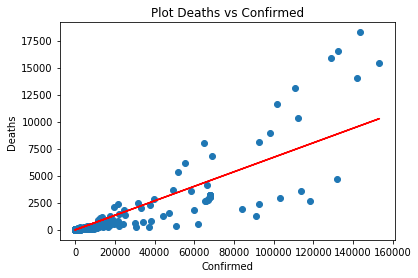

In [12]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.title('Plot Deaths vs Confirmed')

In [26]:
regressor.predict([[6760]])

array([[424.45425653]])

In [20]:
x = ambil.iloc[:,0].values.reshape(-1,1)
y = ambil.iloc[:,1].values.reshape(-1,1)
X_train,X_test,Y_train,Y_test = train_test_split(x,y,random_state=0)

In [21]:
clf = LogisticRegression()
clf.fit(X_train,Y_train)

C:\Users\Afif\Anaconda3\envs\Citra\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Afif\Anaconda3\envs\Citra\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

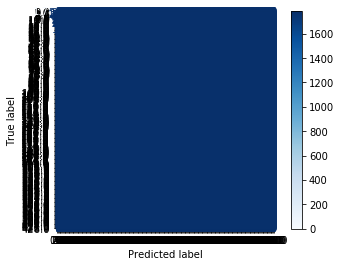

In [22]:
disp = plot_confusion_matrix(clf,X_test,Y_test,cmap='Blues',values_format = '.3g')

In [23]:
disp.confusion_matrix

array([[1783,    7,    0, ...,    0,    0,    0],
       [ 368,   27,    0, ...,    0,    0,    0],
       [ 200,    6,    0, ...,    0,    0,    0],
       ...,
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0]], dtype=int64)

In [81]:
#Menghitung rata rata
rata = np.mean(listdata,axis=0)
rata

array([1710.1766065 ,   84.42361011,  423.10801444])

In [82]:
#Menghitung median
median = np.median(listdata,axis=0)
median

array([58.,  0.,  1.])

In [83]:
#Menghitung modus
modus = mode(listdata,axis=0)
print(modus)

ModeResult(mode=array([[1., 0., 0.]]), count=array([[1543, 7237, 6587]]))


[0. 0. 0. ... 0. 2. 1.]


Text(0, 0.5, 'Deaths')

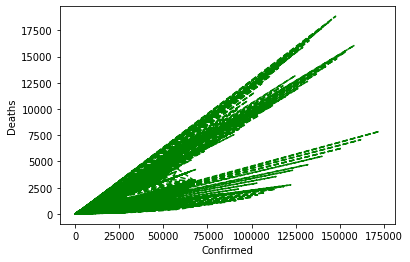

In [84]:
print(listdata[:,1])
plt.plot(listdata[:,0],listdata[:,1],'g--')
plt.xlabel('Confirmed')
plt.ylabel('Deaths')

Text(0, 0.5, 'Deaths')

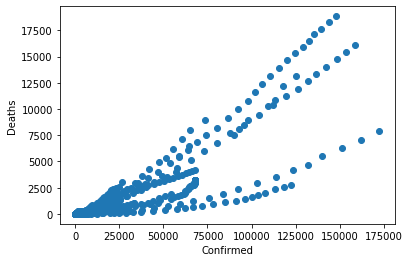

In [85]:
plt.scatter(listdata[:,0],listdata[:,1])
plt.xlabel('Confirmed')
plt.ylabel('Deaths')

Text(0, 0.5, 'Recovered')

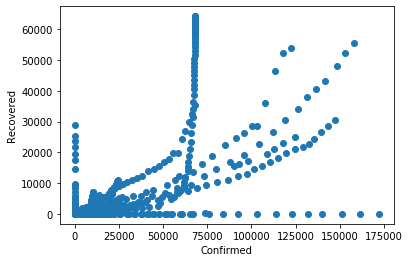

In [86]:
plt.scatter(listdata[:,0],listdata[:,2])
plt.xlabel('Confirmed')
plt.ylabel('Recovered')

In [87]:
#Kemungkinan orang hidup
jumlah_semuanya = np.sum(listdata,axis=0)
prediksi_orang_hidup = (jumlah_semuanya[2]/jumlah_semuanya[0]) * 100
print(prediksi_orang_hidup)

24.740603562973586


In [88]:
#Kemungkinan orang mati
prediksi_orang_mati = (jumlah_semuanya[1]/jumlah_semuanya[0]) * 100
print(prediksi_orang_mati)

4.936543383152187


In [140]:
quartil1 = np.quantile(listdata,.25,axis = 0)
quartil2 = np.quantile(listdata,.50,axis = 0)
quartil3 = np.quantile(listdata,.75,axis = 0)
IQR = quartil3-quartil1
print(quartil1)
print(quartil2)
print(quartil3)
print(IQR)
print(1.5 * IQR)

[5. 0. 0.]
[58.  0.  1.]
[392.   4.  28.]
[387.   4.  28.]
[580.5   6.   42. ]


In [90]:
nilai = quartil1 - (1.5 * IQR)
nilai2 = quartil3 + (1.5 * IQR)
print(nilai)
print(nilai2)


[-575.5   -6.   -42. ]
[972.5  10.   70. ]


In [91]:
Outlier_confirmed = []
for data in listdata[:,0]:
    if data < nilai[0] or data > nilai2[0]:
        Outlier_confirmed.append(data)
print(Outlier_confirmed)
print(len(Outlier_confirmed))

[1058.0, 1423.0, 3554.0, 3554.0, 4903.0, 5806.0, 7153.0, 11177.0, 13522.0, 16678.0, 19665.0, 22112.0, 24953.0, 1034.0, 1006.0, 27100.0, 1095.0, 1048.0, 981.0, 29631.0, 1131.0, 1075.0, 1033.0, 31728.0, 1159.0, 1092.0, 1073.0, 33366.0, 1177.0, 1117.0, 1105.0, 33366.0, 1219.0, 1135.0, 1131.0, 48206.0, 1241.0, 1169.0, 1145.0, 54406.0, 1261.0, 1184.0, 1155.0, 988.0, 56249.0, 1294.0, 1212.0, 1162.0, 1001.0, 58182.0, 1316.0, 1231.0, 1167.0, 1004.0, 59989.0, 1322.0, 1246.0, 1171.0, 1006.0, 973.0, 61682.0, 1328.0, 1257.0, 1172.0, 1007.0, 982.0, 62031.0, 1331.0, 1262.0, 1174.0, 1008.0, 986.0, 62442.0, 1332.0, 1265.0, 1175.0, 1010.0, 987.0, 62662.0, 1333.0, 1267.0, 1203.0, 1011.0, 988.0, 64084.0, 1339.0, 1270.0, 1205.0, 1013.0, 989.0, 64084.0, 1342.0, 1271.0, 1205.0, 1016.0, 989.0, 64287.0, 1345.0, 1271.0, 1205.0, 1016.0, 989.0, 64786.0, 1347.0, 1271.0, 1205.0, 1016.0, 989.0, 977.0, 65187.0, 1347.0, 1271.0, 1261.0, 1205.0, 1016.0, 989.0, 65596.0, 1766.0, 1347.0, 1272.0, 1205.0, 1017.0, 989.0, 659

In [92]:
Outlier_deaths = []
for data in listdata[:,1]:
    if data < nilai[1] or data > nilai2[1]:
        Outlier_deaths.append(data)
print(Outlier_deaths)
print(len(Outlier_deaths))



[17.0, 17.0, 24.0, 40.0, 52.0, 76.0, 125.0, 125.0, 162.0, 204.0, 249.0, 350.0, 414.0, 479.0, 549.0, 618.0, 699.0, 780.0, 871.0, 974.0, 1068.0, 1068.0, 1310.0, 1457.0, 11.0, 11.0, 1596.0, 13.0, 11.0, 1696.0, 13.0, 11.0, 1789.0, 16.0, 11.0, 1921.0, 19.0, 11.0, 2029.0, 19.0, 12.0, 2144.0, 19.0, 12.0, 2144.0, 19.0, 12.0, 2346.0, 19.0, 12.0, 2346.0, 19.0, 12.0, 2495.0, 19.0, 12.0, 12.0, 2563.0, 19.0, 12.0, 16.0, 2615.0, 19.0, 12.0, 12.0, 12.0, 19.0, 2641.0, 13.0, 20.0, 17.0, 13.0, 26.0, 2682.0, 13.0, 20.0, 21.0, 13.0, 34.0, 2727.0, 16.0, 21.0, 29.0, 43.0, 13.0, 2761.0, 17.0, 34.0, 22.0, 54.0, 13.0, 2803.0, 28.0, 52.0, 66.0, 22.0, 13.0, 2835.0, 28.0, 79.0, 77.0, 22.0, 13.0, 2871.0, 35.0, 107.0, 92.0, 22.0, 13.0, 2902.0, 35.0, 148.0, 107.0, 22.0, 13.0, 2931.0, 42.0, 124.0, 197.0, 22.0, 13.0, 12.0, 2959.0, 44.0, 233.0, 145.0, 22.0, 11.0, 13.0, 15.0, 2986.0, 366.0, 50.0, 194.0, 22.0, 19.0, 17.0, 13.0, 17.0, 3008.0, 463.0, 53.0, 237.0, 22.0, 19.0, 28.0, 17.0, 13.0, 17.0, 3024.0, 631.0, 291.0, 54

In [93]:
Outlier_recovered = []
for data in listdata[:,2]:
    if data < nilai[2] or data > nilai2[2]:
        Outlier_recovered.append(data)
print(Outlier_recovered)
print(len(Outlier_recovered))

[80.0, 88.0, 90.0, 141.0, 168.0, 295.0, 386.0, 522.0, 633.0, 78.0, 817.0, 94.0, 81.0, 1115.0, 88.0, 123.0, 86.0, 112.0, 1439.0, 112.0, 175.0, 116.0, 156.0, 1795.0, 141.0, 201.0, 153.0, 186.0, 72.0, 73.0, 71.0, 71.0, 2222.0, 167.0, 242.0, 191.0, 208.0, 88.0, 105.0, 81.0, 80.0, 2639.0, 212.0, 270.0, 218.0, 247.0, 105.0, 128.0, 93.0, 79.0, 80.0, 85.0, 2686.0, 275.0, 246.0, 321.0, 304.0, 127.0, 152.0, 125.0, 102.0, 92.0, 92.0, 3459.0, 314.0, 296.0, 360.0, 339.0, 157.0, 170.0, 139.0, 128.0, 105.0, 104.0, 4774.0, 362.0, 357.0, 403.0, 364.0, 193.0, 187.0, 157.0, 152.0, 136.0, 114.0, 80.0, 90.0, 87.0, 5623.0, 410.0, 391.0, 428.0, 425.0, 221.0, 210.0, 186.0, 184.0, 156.0, 119.0, 98.0, 124.0, 101.0, 71.0, 6639.0, 465.0, 440.0, 456.0, 464.0, 255.0, 240.0, 218.0, 207.0, 173.0, 131.0, 79.0, 108.0, 140.0, 105.0, 82.0, 71.0, 7862.0, 524.0, 509.0, 507.0, 498.0, 280.0, 275.0, 258.0, 225.0, 191.0, 156.0, 85.0, 114.0, 161.0, 122.0, 90.0, 79.0, 9128.0, 565.0, 522.0, 535.0, 527.0, 361.0, 310.0, 280.0, 254.

In [95]:
Counter_confirmed = Counter(listdata[:,0])
Counter_deaths = Counter(listdata[:,1])
Counter_Recovered = Counter(listdata[:,2])

Counter({0.0: 7237, 1.0: 1615, 2.0: 789, 3.0: 570, 6.0: 409, 4.0: 339, 5.0: 219, 8.0: 178, 7.0: 175, 13.0: 97, 10.0: 92, 9.0: 81, 22.0: 79, 12.0: 68, 11.0: 64, 16.0: 48, 15.0: 45, 18.0: 45, 17.0: 44, 19.0: 41, 14.0: 40, 21.0: 38, 20.0: 37, 23.0: 33, 24.0: 30, 34.0: 27, 27.0: 26, 25.0: 26, 29.0: 23, 32.0: 21, 26.0: 20, 43.0: 19, 44.0: 19, 31.0: 18, 30.0: 18, 54.0: 17, 65.0: 17, 35.0: 16, 38.0: 16, 36.0: 16, 66.0: 15, 28.0: 14, 33.0: 14, 48.0: 13, 46.0: 13, 40.0: 12, 50.0: 12, 37.0: 12, 41.0: 12, 52.0: 11, 94.0: 11, 45.0: 11, 42.0: 10, 58.0: 10, 39.0: 10, 92.0: 9, 55.0: 9, 72.0: 9, 67.0: 9, 47.0: 9, 57.0: 9, 77.0: 8, 53.0: 8, 61.0: 8, 69.0: 8, 80.0: 8, 63.0: 8, 76.0: 7, 60.0: 7, 75.0: 7, 71.0: 7, 136.0: 7, 49.0: 7, 51.0: 7, 79.0: 6, 107.0: 6, 81.0: 6, 111.0: 6, 59.0: 6, 78.0: 6, 150.0: 6, 86.0: 6, 73.0: 6, 91.0: 5, 83.0: 5, 102.0: 5, 62.0: 5, 119.0: 5, 108.0: 5, 68.0: 5, 56.0: 5, 90.0: 5, 85.0: 5, 99.0: 5, 148.0: 4, 179.0: 4, 98.0: 4, 97.0: 4, 88.0: 4, 120.0: 4, 158.0: 4, 122.0: 4, 210.0

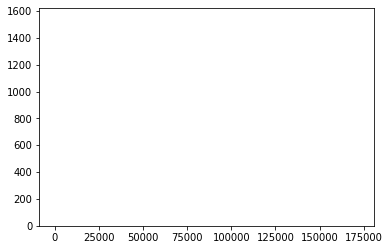

In [103]:
plt.bar(Counter_confirmed.keys(),Counter_confirmed.values())
plt.show()